# 18기 Time Series 정규세션 과제

### Electric_Production.csv 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
첨부한 '시계열자료_실습.ipynb' 코드를 참고하셔도 좋습니다.
데이터셋 출처 :  https://www.kaggle.com/datasets/shenba/time-series-datasets

### Box-Jenkins 방법론
![image.png](attachment:image.png)
대략적 흐름 예시를 확인하고 싶다면 첨부한 '시계열자료_참고자료.pdf'를 읽어주세요.

### Prophet
튜토리얼 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

## 라이브러리 불러오기

In [14]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse


## 데이터 불러오기

In [3]:
df = pd.read_csv('./Electric_Production.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [6]:
df.DATE = pd.to_datetime(df.DATE)

In [7]:
df = df.set_index("DATE")
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [8]:
df.index.freq = 'MS'

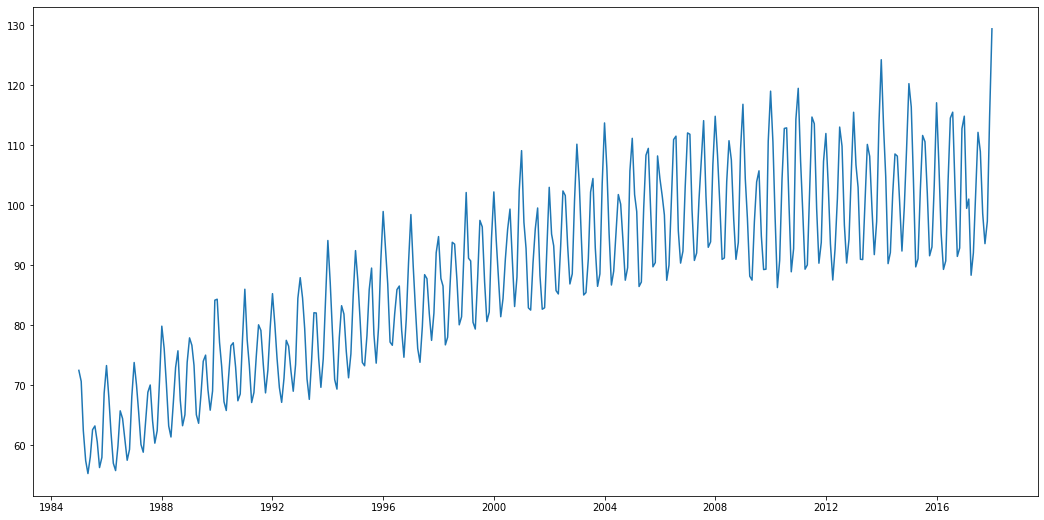

In [10]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["IPG2211A2N"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show()

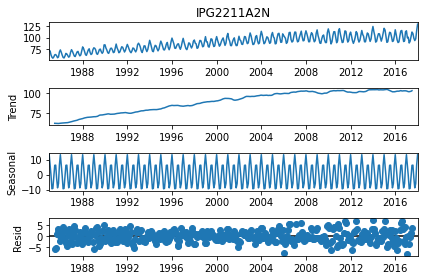

In [11]:
a = seasonal_decompose(df["IPG2211A2N"], model = "add")
a.plot();

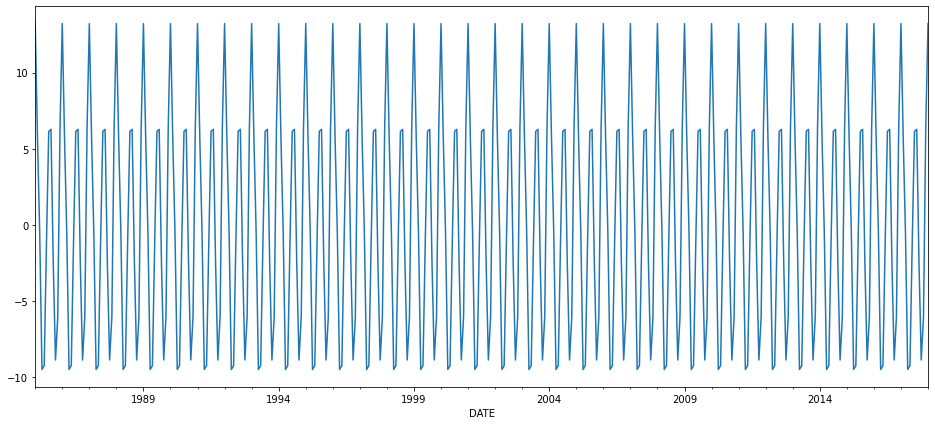

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [15]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [16]:
arima_model = SARIMAX(train_data['IPG2211A2N'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                 IPG2211A2N   No. Observations:                  385
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood                -876.001
Date:                                    Tue, 23 Aug 2022   AIC                           1774.001
Time:                                            08:35:30   BIC                           1817.458
Sample:                                        01-01-1985   HQIC                          1791.238
                                             - 01-01-2017                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5341      0.052     10.270      0.000       0.432       0.636
ar.L2         -0.0756      0.053     -1.431      0.152      -0.179       0.028
ma.L1         -0.9458      0.020    -46.629      0.000      -0.986      -0.906
ar.S.L12       0.5971      0.490      1.218      0.223      -0.363       1.558
ar.S.L24       0.6935      0.698      0.993      0.321      -0.675       2.062
ar.S.L36      -0.5600      0.423     -1.322      0.186      -1.390       0.270
ar.S.L48       0.2614      0.148      1.771      0.077      -0.028       0.551
ma.S.L12      -0.3087      0.513     -0.601      0.548      -1.315       0.698
ma.S.L24      -0.7772      0.595     -1.307      0.191      -1.943       0.389
ma.S.L36       0.4915      0.275      1.787      0.074      -0.048       1.031
sigma2         5.0855      0.386     13.176      0.000       4.329       5.842
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.22
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.60   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2017-02-01    106.000015
2017-03-01     98.355070
2017-04-01     89.775984
2017-05-01     91.987456
2017-06-01    103.130933
2017-07-01    112.739690
2017-08-01    111.776534
2017-09-01    100.648258
2017-10-01     91.891735
2017-11-01     95.783398
2017-12-01    111.065377
2018-01-01    118.181873
Freq: MS, Name: ARIMA Predictions, dtype: float64

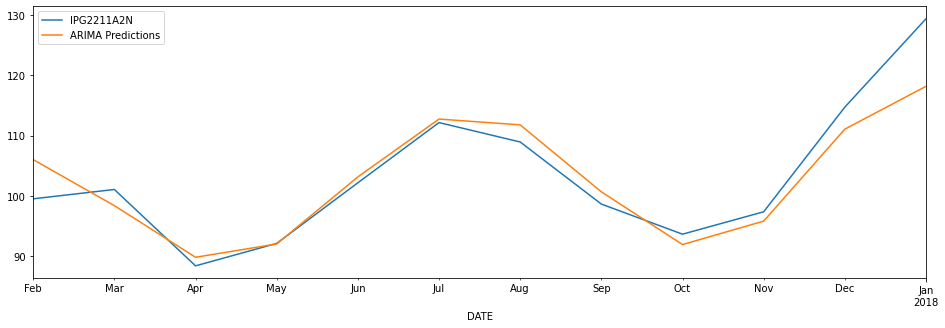

In [19]:
test_data['IPG2211A2N'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [20]:
arima_rmse_error = rmse(test_data['IPG2211A2N'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['IPG2211A2N'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 17.486788569438282
RMSE Error: 4.181720766555113
Mean: 88.84721763224182


In [21]:
test_data['ARIMA_Predictions'] = arima_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
